# **Machine Learning from Data**

## Lab 1: MAP and Gaussian data - Part 2

2021 - 2023 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

##Classification criteria based on maximizing the posterior probability

##Part2: Eigenvalues of the covariance matrix and cluster shape
In this second part we will work with the QPSK modulation. Therefore, we have a classification problem with four classes and two features per class.

We will consider two cases: covariances of all classes identical but arbitrary (case 2 studied in class) and different covariant matrices(case 3).

In [1]:
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from numpy.random import default_rng
# initialize a random seed such that every execution will raise same random sequences of results
rng = default_rng(seed=5)


#1. Data generation

###Parameter initialization

The parameter $\sigma$ will be derived from the desired SNR, given as input:

In [2]:
# Input a SNR value:
SNR = 10
#SNR = 5

# Design parameters
dist=1.                # distance between classes mean
n_classes = 4          # number of classes
n_samples = 1000;      # number of samples per class
n_feat = 2             # number of features per class

To switch between case 2 and case 3, comment or un-comment the following lines

In each case, you can change the value of `ro`

In [3]:
#ro = [0, 0, 0, 0 ]          # CASE 2
#ro = [0.5, 0.5, 0.5, 0.5]  # CASE 2
ro=[0.5, 0, -0.5, 0.8]     # CASE 3

In [17]:
 # M_Means matrix containing the QPSK mean vectors
M_Means = 0.5 * dist * np.array([[1, 1],[1, -1], [-1, 1], [-1,-1]])

# Energy computation
energy = 0
for i in range(0,n_classes):
  energy = energy + np.dot(M_Means[i],M_Means[i])
energy = energy / n_classes

# Noise variance computation
SNR = 10 ** (SNR/10)
sig = energy / SNR
#sig = sig / n_feat

M_covar = np.zeros(shape=(4,2,2))
sigma = sig * np.array([30*1,1,1,1])
for i in range(0,n_classes):
  M_covar[i,:,:] = sigma[i] / n_feat * np.array([[1, ro[i]],[ro[i],1]])

print(sigma)
print(M_covar)


[1.5  0.05 0.05 0.05]
[[[ 0.75    0.375 ]
  [ 0.375   0.75  ]]

 [[ 0.025   0.    ]
  [ 0.      0.025 ]]

 [[ 0.025  -0.0125]
  [-0.0125  0.025 ]]

 [[ 0.025   0.02  ]
  [ 0.02    0.025 ]]]


###Dataset generation

In [18]:
# Dataset Generation
# labels is a 1D array with 0-1 int labels
# xdata is a 2D array (columns = features, rows= samples) with random numbers
xdata = np.empty((0,n_feat), float)
labels = np.empty((0), int)
for i in range(0,n_classes):
  ydata = rng.multivariate_normal(mean=M_Means[i,:], cov= M_covar[i,:,:], size= n_samples)
  ylabels = i * np.ones((n_samples),dtype=int)
  xdata = np.append(xdata, ydata, axis=0)
  labels = np.append(labels, ylabels, axis=0)

# shuffle data (xdata and labels, same order)
rp = np.random.permutation(len(xdata))
xdatas = xdata[rp]
xlabs  = labels[rp]

print(np.shape(xdatas))
print(np.shape(xlabs))

(4000, 2)
(4000,)


###Scatter plot

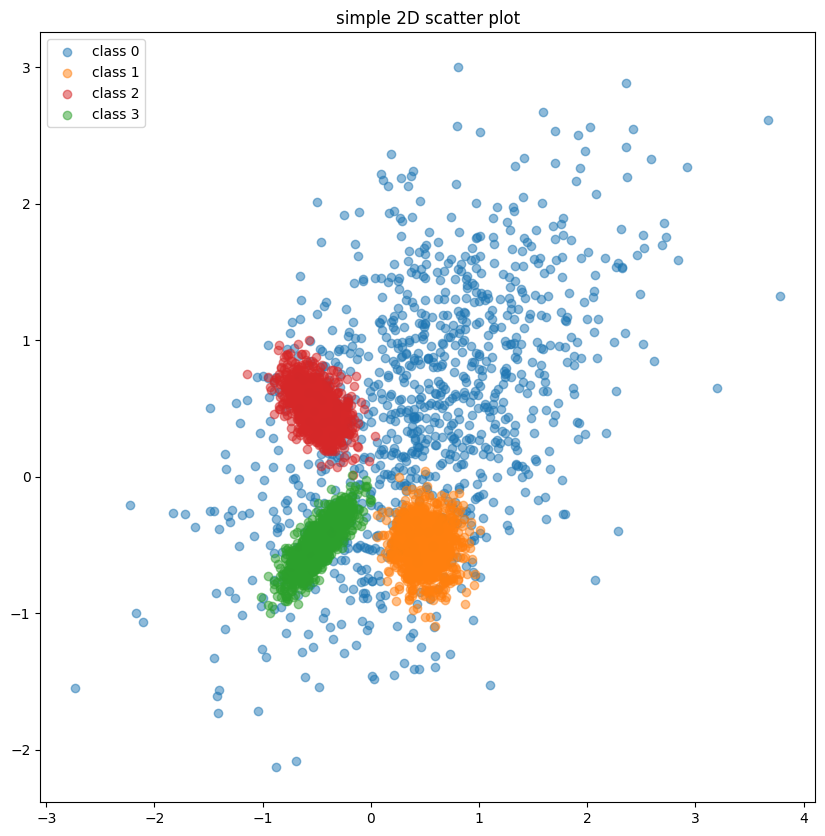

In [19]:
# 2D scatter plot (not interactive in colab!)

fig, ax = plt.subplots(figsize = (10,10))
#ax = fig.add_subplot(111, projection='3d')
col = ['tab:blue','tab:orange','tab:red','tab:green']
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);

plt.title("simple 2D scatter plot")
plt.legend()
plt.show()

#2. LDA and QDA Classifiers
We fit the models and evaluate them on the training data

In [20]:
# Create a linear discriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train = xdatas
y_train = xlabs

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)

print('LDA model priors:',ldamodel.priors_)
print('LDA model means:',ldamodel.means_)
print('LDA models covariance:', ldamodel.covariance_)


linear_error = 1. - accuracy_score(y_train,y_tpred_lda)
print('LDA error: %f' %linear_error)
print('LDA confusion matrix:')
print(confusion_matrix(y_train,y_tpred_lda))


# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)

print('QDA model priors:',qdamodel.priors_)
print('QDA model means:',qdamodel.means_)
print('QDA models covariances:', qdamodel.covariance_)

qda_error = 1. - accuracy_score(y_train,y_tpred_qda)
print('QDA error: %f' %qda_error)
print('QDA confusion matrix:')
print(confusion_matrix(y_train,y_tpred_qda))



LDA model priors: [0.25 0.25 0.25 0.25]
LDA model means: [[ 0.47403272  0.47545405]
 [ 0.50032895 -0.50443752]
 [-0.50000479  0.50793476]
 [-0.49413532 -0.50215417]]
LDA models covariance: [[0.20832813 0.09179029]
 [0.09179029 0.20430309]]
LDA error: 0.132750
LDA confusion matrix:
[[ 482  190  204  124]
 [   2  996    0    2]
 [   5    0  991    4]
 [   0    0    0 1000]]
QDA model priors: [0.25 0.25 0.25 0.25]
QDA model means: [[ 0.47403272  0.47545405]
 [ 0.50032895 -0.50443752]
 [-0.50000479  0.50793476]
 [-0.49413532 -0.50215417]]
QDA models covariances: [array([[0.75773369, 0.35953693],
       [0.35953693, 0.74066777]]), array([[ 0.02481689, -0.00078087],
       [-0.00078087,  0.02748058]]), array([[ 0.02519091, -0.01236423],
       [-0.01236423,  0.0239268 ]]), array([[0.02640519, 0.02113685],
       [0.02113685, 0.02595523]])]
QDA error: 0.053750
QDA confusion matrix:
[[824  65  66  45]
 [ 13 987   0   0]
 [ 13   0 987   0]
 [ 13   0   0 987]]


### Decision boundaries for the lineal model
For the lineal classifier we can plot the decision boundaries.
In a multiclass problem like this, this is a one vs. all classifier, so hyperplanes show the boundary between each class agaist all the others.

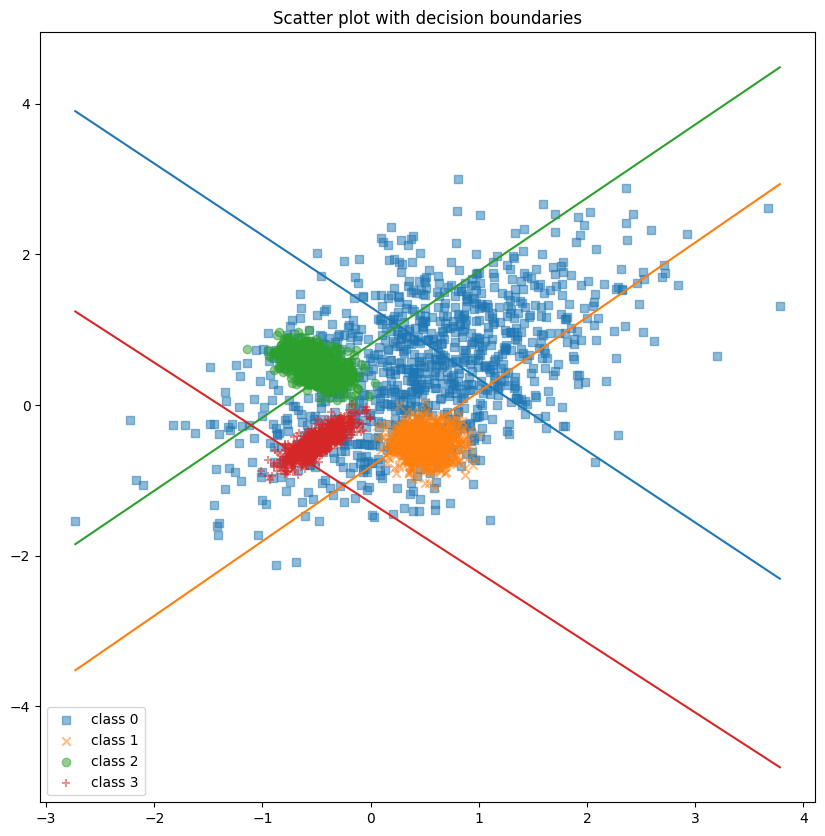

In [21]:
# coef_ : shape of (n_classes, n_features)
# intercept_ :  shape of (n_classes,)

# Plot the hyperplanes: one vs all
fig, ax = plt.subplots(figsize = (10,10))

col = ['tab:blue','tab:orange','tab:green','tab:red']

for l,c, m in zip(np.unique(y_train),col,['s','x','o','+']):
    plt.scatter(X_train[y_train==l,0],
                X_train[y_train==l,1],
                c=c, marker=m,label='class %d' %l, alpha=0.5)
# marker=m
x1 = np.array([np.min(X_train[:,0], axis=0), np.max(X_train[:,0], axis=0)])

# lines for class 0
for i, c in enumerate(col):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2
    plt.plot(x1,y1,c=c)

plt.title("Scatter plot with decision boundaries")
plt.legend()
plt.show()

###Plotting decision regions
We can make a different plot, where we classify all points on a 2D region around the sample data (labels are presented with different colors) and show a scatter plot of the sample (labels represented with different colors).

We make this plot for the linear and for the quadratic models.

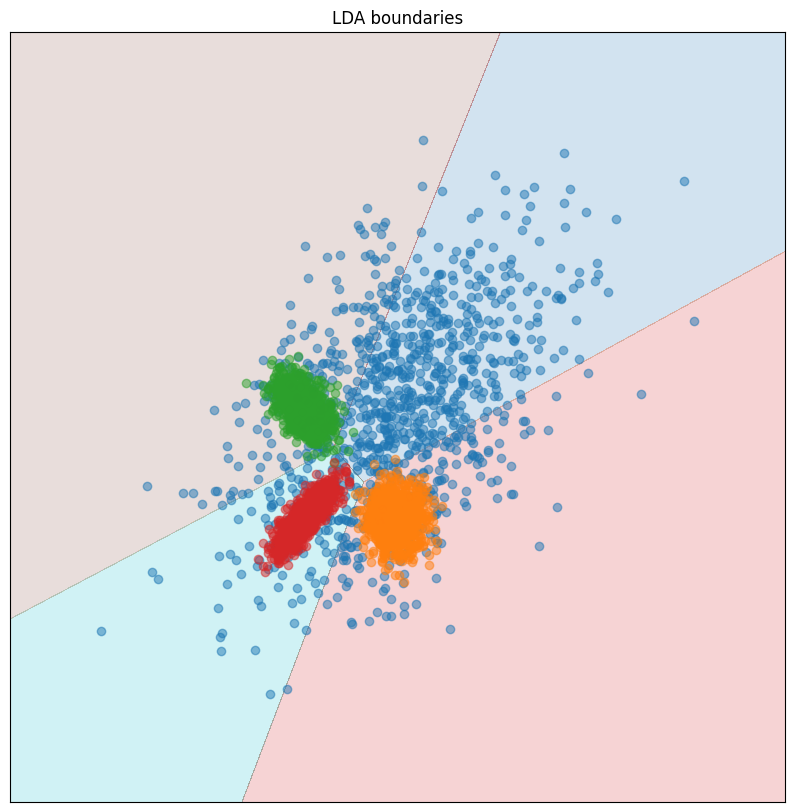

In [22]:
# For the lineal model

X = X_train
y = y_train
h = .001 # step size in the mesh


col = ['tab:blue','tab:orange','tab:green','tab:red']
#for idclass in range(0, n_classes):
#  idx = xlabs==idclass
#  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize = (10,10))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, colors = col, alpha=0.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('LDA boundaries')

plt.show()

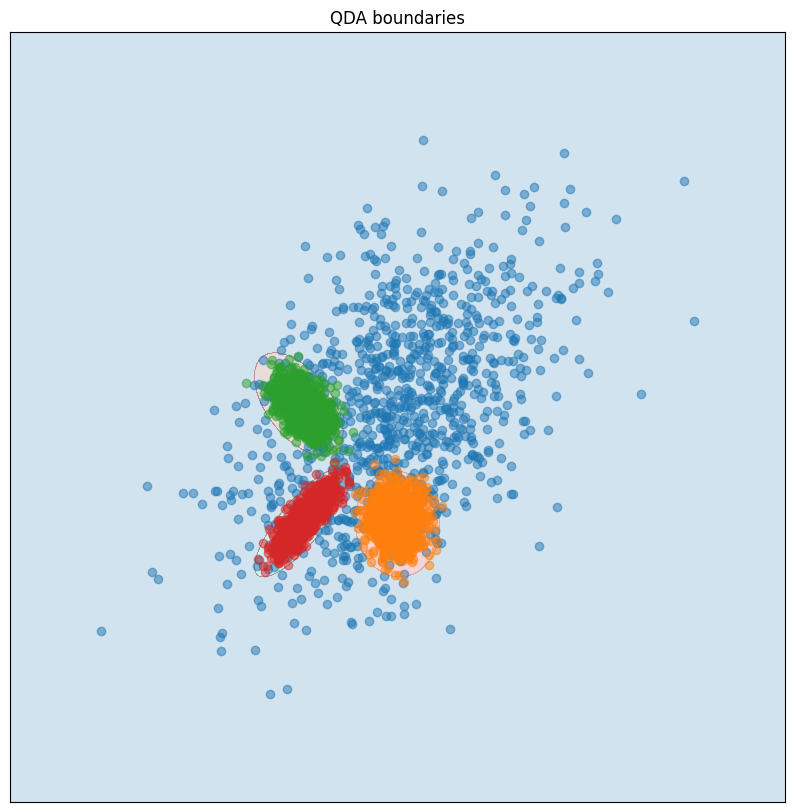

In [23]:
# For the quadratic model

X = X_train
y = y_train
h = .001 # step size in the mesh


col = ['tab:blue','tab:orange','tab:green','tab:red']
#for idclass in range(0, n_classes):
#  idx = xlabs==idclass
#  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize = (10,10))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, colors = col, alpha=0.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('QDA boundaries')

plt.show()

Q6. Include the scatter plot, decision boundary, confusion matrices and error probabilities obtained using the linear classifier (LC) and the quadratic classifier (QC) for ρ = 0. Compare the metrics for the two classifiers and discuss the results.

LDA error: 0.132750
LDA confusion matrix:
[[ 482  190  204  124]
 [   2  996    0    2]
 [   5    0  991    4]
 [   0    0    0 1000]]
QDA error: 0.053750
QDA confusion matrix:
[[824  65  66  45]
 [ 13 987   0   0]
 [ 13   0 987   0]
 [ 13   0   0 987]]


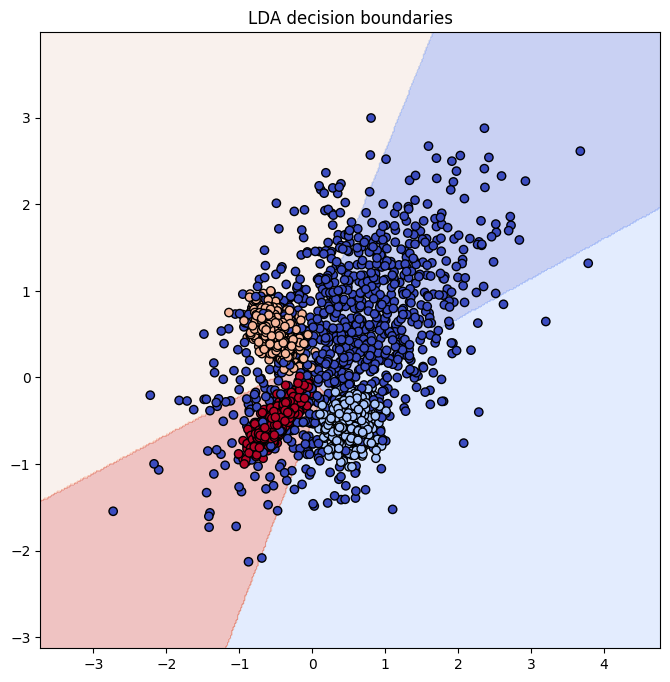

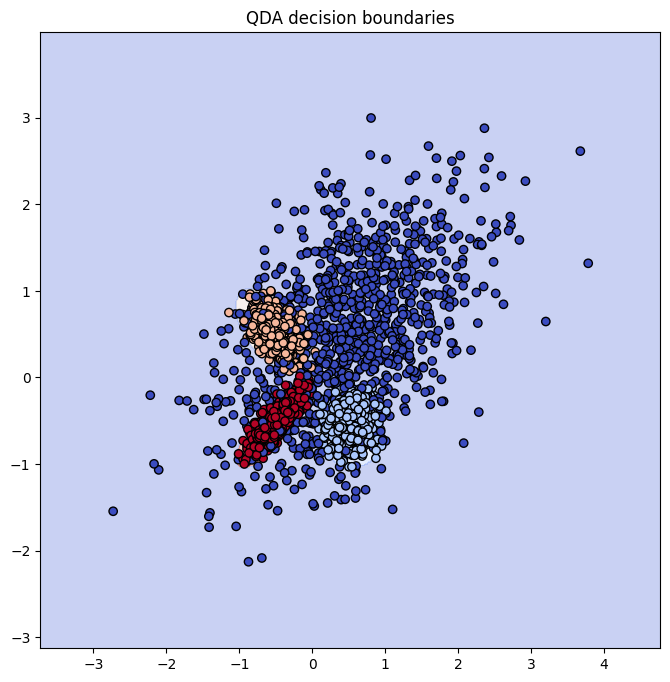

In [24]:
#Define the classifier and result
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

#LDA model
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)

# error rate for LDA
linear_error = 1. - accuracy_score(y_train, y_tpred_lda)
print('LDA error: %f' % linear_error)

#print confusion matrix for LDA
print('LDA confusion matrix:')
print(confusion_matrix(y_train, y_tpred_lda))

#QDA model
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)

#error rate for QDA
qda_error = 1. - accuracy_score(y_train, y_tpred_qda)
print('QDA error: %f' % qda_error)

print('QDA confusion matrix:')
print(confusion_matrix(y_train, y_tpred_qda))

#The scatter plot and decision boundaries for both classifiers
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#LDA decision boundaries
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_lda, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('LDA decision boundaries')
plt.show()

#QDA decision boundaries
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_qda, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('QDA decision boundaries')
plt.show()





Q7. Repeat the previous analysis (Q6) for ρ = 0,5. Compare the metrics for the two classifiers and discuss the results.

LDA error: 0.737000
LDA confusion matrix:
[[ 31  53 137  26]
 [ 30  42 127  43]
 [ 31  49 141  36]
 [ 35  36 134  49]]
QDA error: 0.711000
QDA confusion matrix:
[[142  25  53  27]
 [123  34  41  44]
 [123  37  61  36]
 [111  39  52  52]]


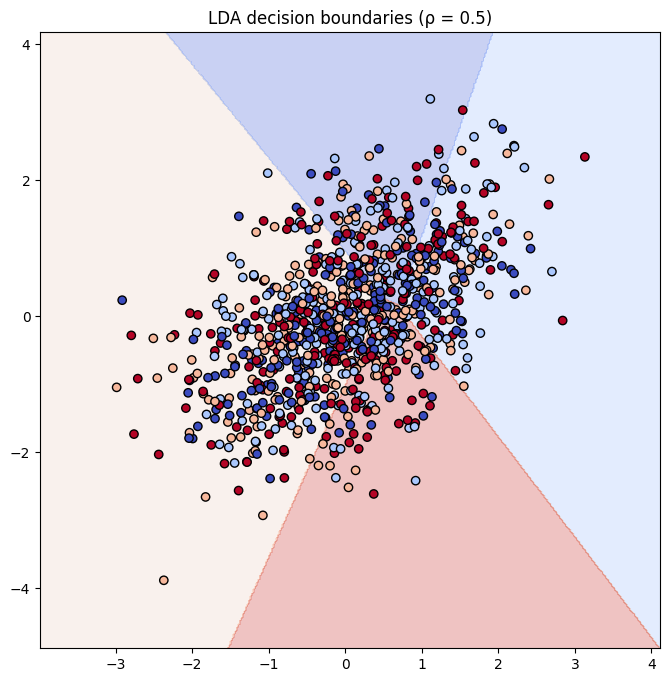

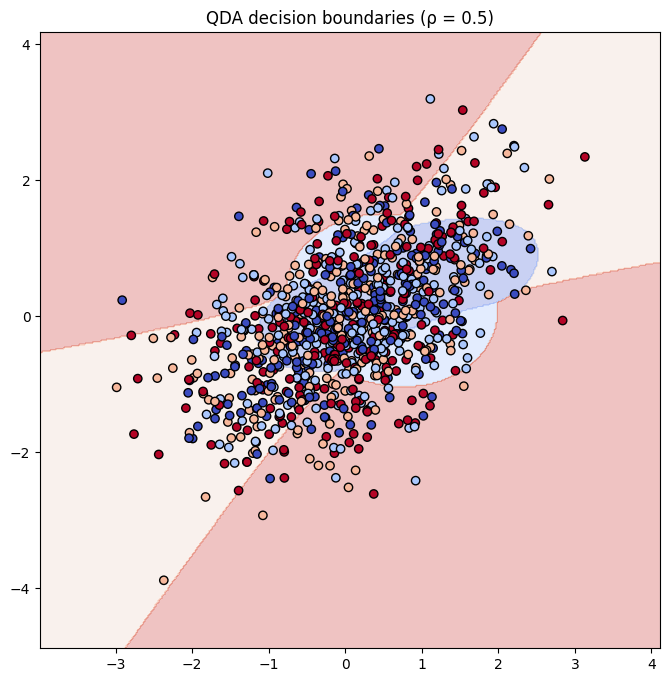

In [25]:
# Creating correlated data with ρ = 0.5
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix with ρ = 0.5
X_train = np.random.multivariate_normal(mean, cov, 1000)
y_train = np.random.randint(0, 4, 1000)

# Define classifiers (LC and QC)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# Train and predict LC
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)

# Error rate for LC
linear_error = 1. - accuracy_score(y_train, y_tpred_lda)
print('LDA error: %f' % linear_error)

# Confusion matrix for LC
print('LDA confusion matrix:')
print(confusion_matrix(y_train, y_tpred_lda))

# Train and predict with QC
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)

# Error rate for QC
qda_error = 1. - accuracy_score(y_train, y_tpred_qda)
print('QDA error: %f' % qda_error)

# Confusion matrix for QC
print('QDA confusion matrix:')
print(confusion_matrix(y_train, y_tpred_qda))

# Plot decision boundaries for both classifiers
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# LC decision boundaries
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_lda, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('LDA decision boundaries (ρ = 0.5)')
plt.show()

# QC decision boundaries
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_qda, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('QDA decision boundaries (ρ = 0.5)')
plt.show()


Q8. Compare and discuss the results obtained in Q8 and Q9



Q9. Include the error probabilities obtained using the linear classifier (LC) and the quadratic classifier (QC) for SNR = +5 dB and +10 dB. Compare the metrics for the two classifiers and discuss the results.


In [26]:
#noise

def add_noise(X, snr_db):
    signal_power = np.mean(np.square(X))
    snr = 10 ** (snr_db / 10)
    noise_power = signal_power / snr
    noise = np.random.normal(0, np.sqrt(noise_power), X.shape)
    return X + noise

#create data
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
X_train = np.random.multivariate_normal(mean, cov, 1000)
y_train = np.random.randint(0, 4, 1000)

#linear classifier (LC) and the quadratic classifier (QC)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

#test SNR = +5 dB
X_train_noisy_5db = add_noise(X_train, 5)

#LC
lda_model_5db = lda.fit(X_train_noisy_5db, y_train)
y_pred_lda_5db = lda_model_5db.predict(X_train_noisy_5db)
lda_error_5db = 1. - accuracy_score(y_train, y_pred_lda_5db)
print('LC error (SNR = +5 dB): %f' % lda_error_5db)
#QC
qda_model_5db = qda.fit(X_train_noisy_5db, y_train)
y_pred_qda_5db = qda_model_5db.predict(X_train_noisy_5db)
qda_error_5db = 1. - accuracy_score(y_train, y_pred_qda_5db)
print('QC error (SNR = +5 dB): %f' % qda_error_5db)


#test SNR = +10 dB
X_train_noisy_10db = add_noise(X_train, 10)

#LC
lda_model_10db = lda.fit(X_train_noisy_10db, y_train)
y_pred_lda_10db = lda_model_10db.predict(X_train_noisy_10db)
lda_error_10db = 1. - accuracy_score(y_train, y_pred_lda_10db)
print('LC error (SNR = +10 dB): %f' % lda_error_10db)
#QC
qda_model_10db = qda.fit(X_train_noisy_10db, y_train)
y_pred_qda_10db = qda_model_10db.predict(X_train_noisy_10db)
qda_error_10db = 1. - accuracy_score(y_train, y_pred_qda_10db)
print('QC error (SNR = +10 dB): %f' % qda_error_10db)


LC error (SNR = +5 dB): 0.715000
QC error (SNR = +5 dB): 0.707000
LC error (SNR = +10 dB): 0.719000
QC error (SNR = +10 dB): 0.706000


In [27]:
from scipy.linalg import eigvals

matrices = np.array([[[0.07905694, 0.03952847],
                      [0.03952847, 0.07905694]],

                     [[0.07905694, 0.        ],
                      [0.        , 0.07905694]],

                     [[0.07905694, -0.03952847],
                      [-0.03952847, 0.07905694]],

                     [[0.07905694, 0.06324555],
                      [0.06324555, 0.07905694]]])

eigenvalues = [eigvals(matrix) for matrix in matrices]


for i, eig in enumerate(eigenvalues):
    print(f"Eigenvalues of matrix {i}:\n{eig}\n")

Eigenvalues of matrix 0:
[0.11858541+0.j 0.03952847+0.j]

Eigenvalues of matrix 1:
[0.07905694+0.j 0.07905694+0.j]

Eigenvalues of matrix 2:
[0.11858541+0.j 0.03952847+0.j]

Eigenvalues of matrix 3:
[0.14230249+0.j 0.01581139+0.j]



In [28]:
def lambda_1(rho = .8, sigma=0.15811388):
    return (1 + rho) * (sigma ** 2) / 2

def lambda_2(rho, sigma):
    return (1 - rho) * (sigma ** 2) / 2

# Example usage:
rho = 0.5  # Example value for rho
sigma = 2  # Example value for sigma

print(f"Lambda 1: {lambda_1(rho, sigma)}")
print(f"Lambda 2: {lambda_2(rho, sigma)}")


Lambda 1: 3.0
Lambda 2: 1.0
